## E-Commerce Fraud Detection Data Visualisation

## Objectives

* Create clear, exam-friendly visualisations that answer the business questions (fraud rate, when/where fraud occurs, by how much, and risk).

* Save PNGs/CSVs to reports/figures/ and reports/tables/ for README (and later Power BI).
* Keep captions/notes short & plain-English

## Inputs

* data/processed/cleaned_transactions.csv

## Outputs

* Figures in reports/figures/…
* Summary tables in reports/tables/…





---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [24]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Nine\\OneDrive\\Documents\\VS Code Projects\\E-Commerce-Fraud-Detection-Capstone\\E-Commerce-Fraud-Detection-Capstone\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [25]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [26]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Nine\\OneDrive\\Documents\\VS Code Projects\\E-Commerce-Fraud-Detection-Capstone\\E-Commerce-Fraud-Detection-Capstone'

# Section 1

Set up and load libraries along with dataset.

In [27]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path

In [28]:
# Loading the cleaned transactions dataset

csv_path = Path("DataSet/Cleaned/cleaned_transactions.csv")

# Check if file exists
if not csv_path.exists():
    print(f"❌ File not found: {csv_path.resolve()}")
    print("Available files in DataSet/Cleaned/:")
    cleaned_dir = Path("DataSet/Cleaned")
    if cleaned_dir.exists():
        for file in cleaned_dir.glob("*.csv"):
            print(f"  - {file.name}")
    else:
        print("  Directory doesn't exist")
else:
    # Load the data
    print(f"📂 Loading data from: {csv_path}")
    df = pd.read_csv(csv_path, low_memory=False)
    
    print(f"✅ Data loaded successfully!")
    print(f"📊 Dataset Info:")
    print(f"   Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"   Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
    
    print(f"\n📋 Column Names:")
    for i, col in enumerate(df.columns, 1):
        print(f"   {i:2d}. {col} ({df[col].dtype})")
    
    print(f"\n📈 First 5 rows:")
    display(df.head())
    
    print(f"\n📊 Basic Statistics:")
    if 'is_fraud' in df.columns:
        fraud_counts = df['is_fraud'].value_counts()
        total = len(df)
        print(f"   Fraud Distribution:")
        for value, count in fraud_counts.items():
            label = "Fraudulent" if value else "Legitimate"
            pct = (count / total) * 100
            print(f"     {label}: {count:,} ({pct:.1f}%)")
    
    print(f"\n✅ Dataset ready for visualizations!")

📂 Loading data from: DataSet\Cleaned\cleaned_transactions.csv
✅ Data loaded successfully!
📊 Dataset Info:
   Shape: 10,000 rows × 12 columns
   Memory usage: 2.7 MB

📋 Column Names:
    1. transaction_id (int64)
    2. user_id (int64)
    3. timestamp (object)
    4. amount (float64)
    5. country (object)
    6. device (object)
    7. channel (object)
    8. hour (int64)
    9. dayofweek (int64)
   10. coupon_applied (bool)
   11. num_items (int64)
   12. is_fraud (bool)

📈 First 5 rows:


,transaction_id,user_id,timestamp,amount,country,device,channel,hour,dayofweek,coupon_applied,num_items,is_fraud
0,6253,3594,2023-01-28 06:04:00+00:00,125.79,us,mobile,ads,6,5,False,5,False
1,4685,2502,2023-04-27 21:32:00+00:00,153.40,de,mobile,web,21,3,False,3,False
2,1732,2287,2023-08-19 19:03:00+00:00,7.64,in,tablet,app,19,5,False,3,False
3,4743,3043,2023-03-14 04:56:00+00:00,36.36,us,mobile,web,4,1,True,2,False
4,4522,4629,2023-09-24 21:33:00+00:00,55.17,es,mobile,app,21,6,False,1,False



📊 Basic Statistics:
   Fraud Distribution:
     Legitimate: 9,357 (93.6%)
     Fraudulent: 643 (6.4%)

✅ Dataset ready for visualizations!


In [32]:
# Adding the folder to where images will be saved

FIGDIR = Path("reports/figures"); FIGDIR.mkdir(parents=True, exist_ok=True)

---

# Section 2

Section 2 will show our visualisations representing key metrics and also complying with the capstone project objective.

,metric,value
0,Total Transactions,10000.00
1,Fraud Count,643.00
2,Fraud Rate (%),6.43
3,Total Amount,797973.54


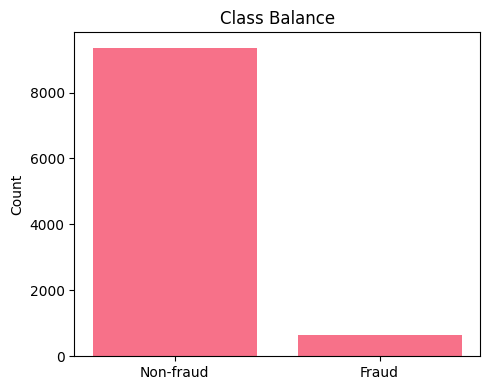

In [39]:
# Here we will create some key performance indicators (KPIs) and Class Balance Bar

total_tx   = len(df)
fraud_tx   = int(df["is_fraud"].sum())          
fraud_rate = round(fraud_tx / total_tx * 100, 2)
total_amt  = round(df["amount"].sum(), 2)

kpi = pd.DataFrame({
    "metric": ["Total Transactions","Fraud Count","Fraud Rate (%)","Total Amount"],
    "value":  [total_tx, fraud_tx, fraud_rate, total_amt]
})
display(kpi)

# class balance bar
counts = df["is_fraud"].value_counts()
labels = ["Non-fraud","Fraud"]
plt.figure(figsize=(5,4))
plt.bar(labels, [counts.get(False,0), counts.get(True,0)])
plt.title("Class Balance")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(FIGDIR/"01_class_balance.png", dpi=150)
plt.show()


---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---